## Лабораторная работа №6
Написать метод Эйлера и метод Рунге-Кутта 4 порядка для решения ОДУ 1-го порядка. Решить произвольное уравнение вида y’=f(x)


In [27]:
import matplotlib.pyplot as plt

In [28]:
import numpy as np


def euler_method(diff_eq, initial_x, initial_y, final_x, step_size):
    num_steps = int((final_x - initial_x) / step_size)
    x_values = np.zeros(num_steps + 1)
    y_values = np.zeros(num_steps + 1)
    x_values[0] = initial_x
    y_values[0] = initial_y

    for i in range(num_steps):
        y_values[i + 1] = y_values[i] + step_size * diff_eq(x_values[i], y_values[i])
        x_values[i + 1] = x_values[i] + step_size

    return x_values, y_values


def runge_kutta_method(diff_eq, initial_x, initial_y, final_x, step_size):
    num_steps = int((final_x - initial_x) / step_size)
    x_values = np.zeros(num_steps + 1)
    y_values = np.zeros(num_steps + 1)
    x_values[0] = initial_x
    y_values[0] = initial_y

    for i in range(1, num_steps + 1):
        k1 = step_size * diff_eq(x_values[i - 1], y_values[i - 1])
        k2 = step_size * diff_eq(x_values[i - 1] + step_size / 2, y_values[i - 1] + k1 / 2)
        k3 = step_size * diff_eq(x_values[i - 1] + step_size / 2, y_values[i - 1] + k2 / 2)
        k4 = step_size * diff_eq(x_values[i - 1] + step_size, y_values[i - 1] + k3)

        y_values[i] = y_values[i - 1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        x_values[i] = x_values[i - 1] + step_size

    return x_values, y_values

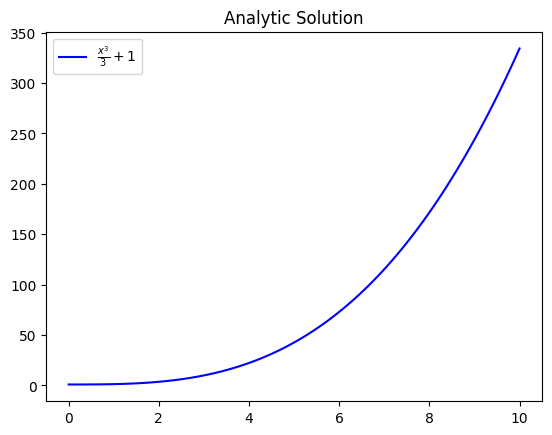

In [29]:
x0, y0 = 0, 1
b = 10
f_prime = lambda x, y: x**2
f = lambda x: x**3 / 3 + 1

X = np.linspace(0, b, 100)
Y = [f(xi) for xi in X]

fig, ax = plt.subplots(1, 1)

ax.plot(X, Y, "b", label="$\\frac{x^3}{3} + 1$")
ax.legend()
ax.set_title("Analytic Solution")

plt.show()

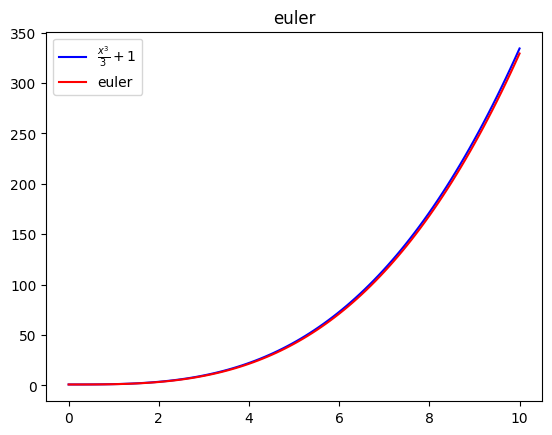

In [30]:
graph, (plot1) = plt.subplots(1, 1)

X_euler, Y_euler = euler_method(f_prime, x0, y0, b, 0.1)
plot1.plot(X, Y, "b")
plot1.plot(X_euler, Y_euler, "r")

plot1.legend(["$\\frac{x^3}{3} + 1$", "euler"])
plot1.set_title("euler")

plt.show()

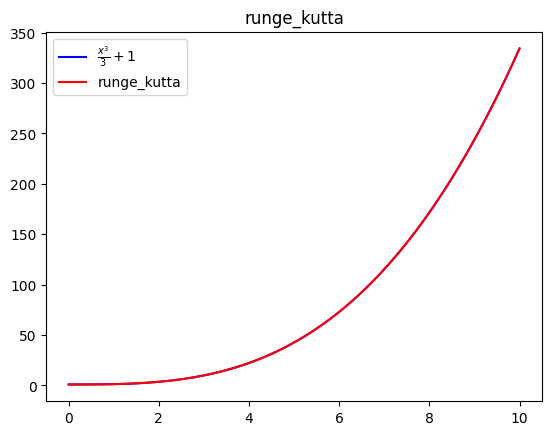

In [31]:
graph, (plot1) = plt.subplots(1, 1)

X_rk, Y_rk = runge_kutta_method(f_prime, x0, y0, b, 0.1)
plot1.plot(X, Y, "b")
plot1.plot(X_rk, Y_rk, "r")

plot1.legend(["$\\frac{x^3}{3} + 1$", "runge_kutta"])
plot1.set_title("runge_kutta")

plt.show()

In [32]:
from functools import reduce


def error(X, Y, F):
    return reduce(lambda s, i: s + (Y[i] - F(X[i])) ** 2, range(len(X)), 0)


print(f"euler error: {error(X_euler, Y_euler, f)}")
print(f"runge_kutta error: {error(X_rk, Y_rk, f)}")

euler error: 508.3423144442715
runge_kutta error: 1.9731475787174082e-23


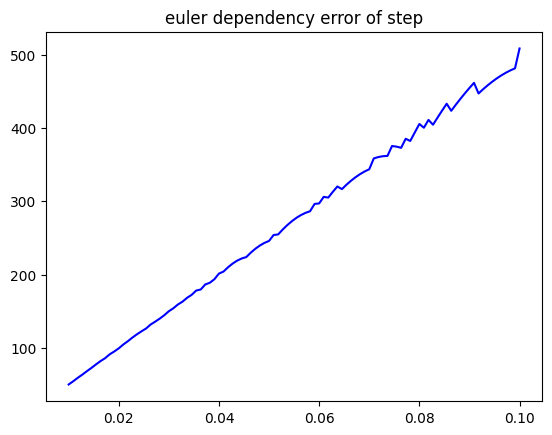

In [33]:
graph, (plot1) = plt.subplots(1, 1)

steps = np.linspace(0.01, 0.1, 100)
errors = [error(*euler_method(f_prime, x0, y0, b, h), f) for h in steps]

plot1.plot(steps, errors, "b")
plot1.set_title("euler dependency error of step")

plt.show()

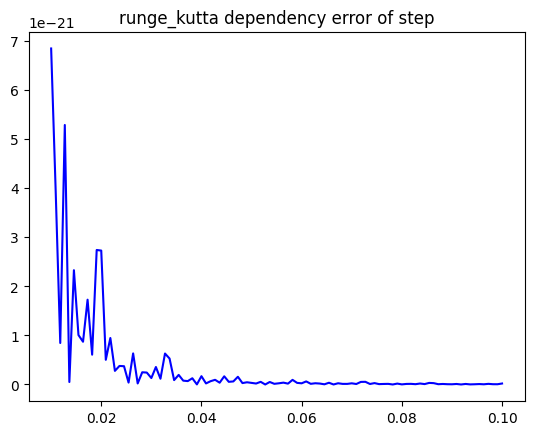

In [34]:
graph, (plot1) = plt.subplots(1, 1)

steps = np.linspace(0.01, 0.1, 100)
errors = [error(*runge_kutta_method(f_prime, x0, y0, b, h), f) for h in steps]

plot1.plot(steps, errors, "b")
plot1.set_title("runge_kutta dependency error of step")

plt.show()